In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn
%matplotlib inline

In [2]:
#import the housing dataset
df = pd.read_csv('Melbourne_housing_FULL.csv')

In [3]:
#take a look at the data
print(df.shape)
df.head()

(34857, 21)


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [4]:
#more information on the types of data present
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
Suburb           34857 non-null object
Address          34857 non-null object
Rooms            34857 non-null int64
Type             34857 non-null object
Price            27247 non-null float64
Method           34857 non-null object
SellerG          34857 non-null object
Date             34857 non-null object
Distance         34856 non-null float64
Postcode         34856 non-null float64
Bedroom2         26640 non-null float64
Bathroom         26631 non-null float64
Car              26129 non-null float64
Landsize         23047 non-null float64
BuildingArea     13742 non-null float64
YearBuilt        15551 non-null float64
CouncilArea      34854 non-null object
Lattitude        26881 non-null float64
Longtitude       26881 non-null float64
Regionname       34854 non-null object
Propertycount    34854 non-null float64
dtypes: float64(12), int64(1), object(8)
memory usage: 5.6+ M

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

#convert date feature to datetime
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, infer_datetime_format=True)

#convert object type features to category
for column in df.select_dtypes(object):
    df[column] = le.fit_transform(df[column].astype(str))

#postcode feature should not be a float but a category
df['Postcode'] = df['Postcode'].astype('category')

In [6]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,0,29458,2,0,NaN,6,155,2016-09-03,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,31,-37.8014,144.9958,2,4019.0
1,0,32512,2,0,1480000.0,2,33,2016-12-03,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,31,-37.7996,144.9984,2,4019.0
2,0,15389,2,0,1035000.0,2,33,2016-02-04,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,31,-37.8079,144.9934,2,4019.0
3,0,9768,3,2,NaN,7,296,2016-02-04,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,31,-37.8114,145.0116,2,4019.0
4,0,25128,3,0,1465000.0,5,33,2017-03-04,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,31,-37.8093,144.9944,2,4019.0


In [7]:
#according to the dataset documentation, the room and bedroom2 features are redundant
df = df.drop('Bedroom2', 1)

In [8]:
df.describe()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
count,34857.000000,34857.000000,34857.000000,34857.000000,2.724700e+04,34857.000000,34857.000000,34856.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,34857.000000,26881.000000,26881.000000,34857.000000,34854.000000
mean,171.576498,17002.385948,3.031012,0.521387,1.050173e+06,2.713171,184.633187,11.184929,1.624798,1.728845,593.598993,160.25640,1965.289885,13.672261,-37.810634,145.001851,3.663826,7572.888306
std,100.542153,9812.989141,0.969933,0.817462,6.414671e+05,1.988551,110.280471,6.788892,0.724212,1.010771,3398.841946,401.26706,37.328178,9.936792,0.090279,0.120169,2.051458,4428.090313
min,0.000000,0.000000,1.000000,0.000000,8.500000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,0.000000,-38.190430,144.423790,0.000000,83.000000
25%,78.000000,8503.000000,2.000000,0.000000,6.350000e+05,2.000000,101.000000,6.400000,1.000000,1.000000,224.000000,102.00000,1940.000000,3.000000,-37.862950,144.933500,2.000000,4385.000000
50%,171.000000,16983.000000,3.000000,0.000000,8.700000e+05,2.000000,198.000000,10.300000,2.000000,2.000000,521.000000,136.00000,1970.000000,12.000000,-37.807600,145.007800,5.000000,6763.000000
75%,261.000000,25498.000000,4.000000,1.000000,1.295000e+06,4.000000,275.000000,14.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,22.000000,-37.754100,145.071900,5.000000,10412.000000
max,350.000000,34008.000000,16.000000,2.000000,1.120000e+07,8.000000,387.000000,48.100000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,33.000000,-37.390200,145.526350,8.000000,21650.000000


What features can we build from the data given that would have an telling impact on the price of a house? We have the year build, so we could figure out how old a house is.

In [9]:
#add an age feature
age_list = []
for value in df['YearBuilt']:
    if value == np.nan:
        age_list.append(np.nan)
    else:
        age_list.append(2018 - value)
df['age'] = age_list

In [10]:
len(age_list)

34857

In [11]:
#look at the distribution of housing ages
print(df['age'].median())
df['age'].describe()

48.0


count    15551.000000
mean        52.710115
std         37.328178
min        -88.000000
25%         18.000000
50%         48.000000
75%         78.000000
max        822.000000
Name: age, dtype: float64

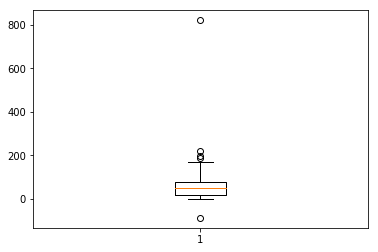

In [12]:
#look to see if that 800 year old house is just a mistake
plt.boxplot(df['age'].dropna())

plt.show()

In [13]:
#there probably isn't actually an 800 year old house or future houses so remove those values
df = df[(df['age'] < 400) | df['age'].isnull()]
df = df[(df['age'] >= 0) | df['age'].isnull()]
print(df['age'].median())
df['age'].describe()

48.0


count    15548.000000
mean        52.673141
std         36.798582
min          0.000000
25%         18.000000
50%         48.000000
75%         78.000000
max        218.000000
Name: age, dtype: float64

In [14]:
#see if there are any strange building area values
df['BuildingArea'].describe()

count    13739.000000
mean       160.246703
std        401.309281
min          0.000000
25%        102.000000
50%        136.000000
75%        188.000000
max      44515.000000
Name: BuildingArea, dtype: float64

In [15]:
#can't have a building area of 0, so we remove that
df = df[(df['age'] > 0) | df['age'].isnull()]

c:\users\zackb\appdata\local\programs\python\python36\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


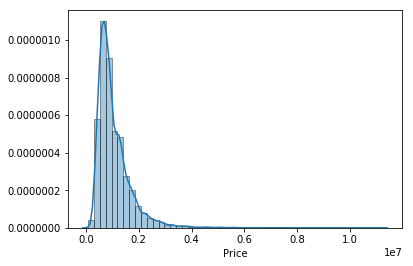

In [16]:
#distribution of prices, the target
sns.distplot(df['Price'].dropna(), hist_kws=dict(edgecolor="k"))
plt.show()

c:\users\zackb\appdata\local\programs\python\python36\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


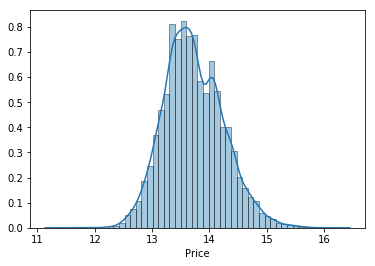

In [17]:
#prices are heavily skewed right, so normalizing them might help our predictions
log_price = np.log(df['Price'])
sns.distplot(log_price.dropna(), hist_kws=dict(edgecolor="k"))
plt.show()

In [18]:
df['Price'] = log_price

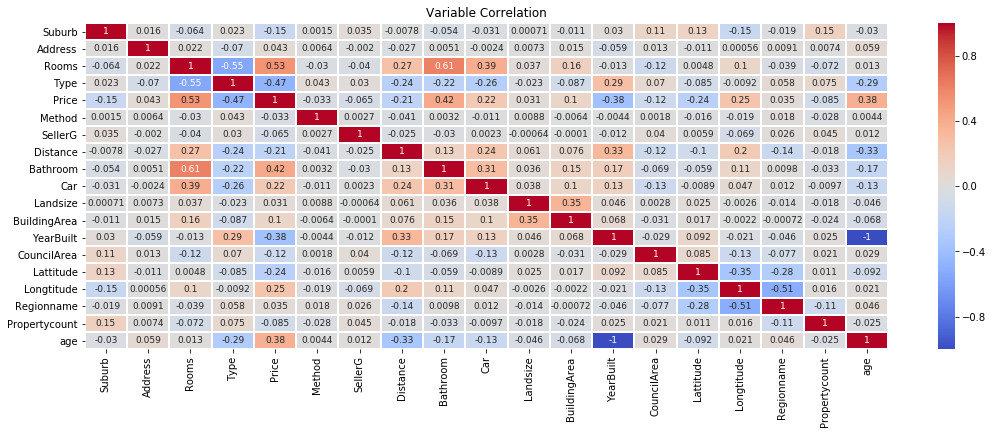

In [20]:
#check for correlation between our features
plt.figure(figsize=(18,6))
sns.heatmap(df.corr(),cmap = 'coolwarm',linewidth = 1,annot= True, annot_kws={"size": 9})
plt.title('Variable Correlation')
plt.show()

In [19]:
#check the percentage of missing data in each feature
df.isnull().sum()/len(df)*100

Suburb            0.000000
Address           0.000000
Rooms             0.000000
Type              0.000000
Price            21.833572
Method            0.000000
SellerG           0.000000
Date              0.000000
Distance          0.002869
Postcode          0.002869
Bathroom         23.604017
Car              25.044476
Landsize         33.888092
BuildingArea     60.588235
YearBuilt        55.397418
CouncilArea       0.000000
Lattitude        22.886657
Longtitude       22.886657
Regionname        0.000000
Propertycount     0.008608
age              55.397418
dtype: float64

There are several features that have a large percentage of thier values missing. In order to complete our model, we have to address these missing values. There are three ways to do this, we can impute these values, we can just drop them, or we can drop the features with the most missing values then drop the remaining few missing values. We will try all three processes and see which model functions best.

In [21]:
#impute missing values
from sklearn.preprocessing import Imputer
imputer = Imputer()

imputed_df = pd.DataFrame(imputer.fit_transform(df.drop('Date', 1)))

In [22]:
imputed_df.columns = df.drop('Date', 1).columns

X_i = imputed_df.drop('Price', 1)
y_i = imputed_df.Price

imputed_df.shape

(34850, 20)

In [23]:
#drop missing values
drop_df = df.dropna()

X_d = drop_df.drop(['Price', 'Date'], 1)
y_d = drop_df.Price

drop_df.shape

(8881, 21)

In [24]:
#drop features with a large percentage of missing values, then drop the remaining NaNs.
selective_df = df.drop(['Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude', 'age'], 1)
selective_df = selective_df.dropna()

X_s = selective_df.drop(['Price', 'Date'], 1)
y_s = selective_df.Price

selective_df.shape

(27238, 13)

In [25]:
#train test split three models
from sklearn.model_selection import train_test_split

Xi_train, Xi_test, yi_train, yi_test = train_test_split(X_i, y_i, test_size=0.3)
Xd_train, Xd_test, yd_train, yd_test = train_test_split(X_d, y_d, test_size=0.3)
Xs_train, Xs_test, ys_train, ys_test = train_test_split(X_s, y_s, test_size=0.3)

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics
regr_i = LinearRegression()
regr_d = LinearRegression()
regr_s = LinearRegression()

In [27]:
#imputed regression
regr_i.fit(Xi_train, yi_train)
yi_pred = regr_i.predict(Xi_test)
print('Imputed R2 Training Score: ', regr_i.score(Xi_train, yi_train))
print('Imputed R2 Test Score: ', regr_i.score(Xi_test, yi_test))
print('Imputed CV Scores: ', cross_val_score(regr_i, Xi_train, yi_train, cv=5), '\n')
print('MAE:', metrics.mean_absolute_error(np.exp(yi_test), np.exp(yi_pred)))
print('MSE:', metrics.mean_squared_error(np.exp(yi_test), np.exp(yi_pred)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(np.exp(yi_test), np.exp(yi_pred))))

Imputed R2 Training Score:  0.4849447689759951
Imputed R2 Test Score:  0.45556049192335446
Imputed CV Scores:  [0.48156138 0.49594368 0.48204353 0.48054626 0.44401712] 

MAE: 2029377.285941075
MSE: 3.2209019551450188e+16
RMSE: 179468714.6871292


c:\users\zackb\appdata\local\programs\python\python36\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


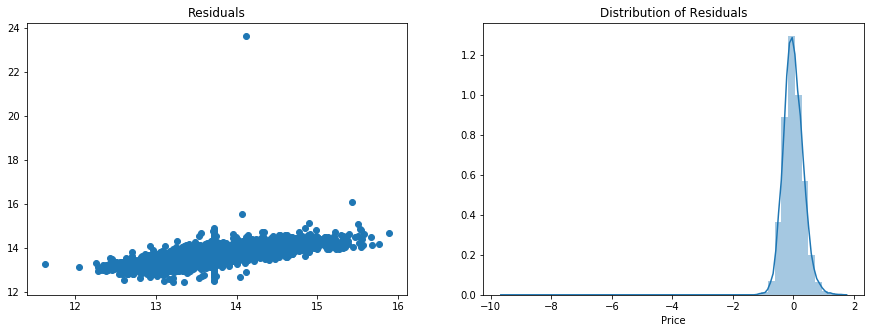

In [28]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.scatter(yi_test, yi_pred)
plt.title('Residuals')

plt.subplot(1, 2, 2)
sns.distplot((yi_test - yi_pred))
plt.title('Distribution of Residuals')
plt.show()

In [29]:
#dropped value regression
regr_d.fit(Xd_train, yd_train)
yd_pred = regr_d.predict(Xd_test)
print('Dropped R2 Training Score: ', regr_d.score(Xd_train, yd_train))
print('Dropped R2 Test Score: ', regr_d.score(Xd_test, yd_test))
print('Dropped CV Scores: ', cross_val_score(regr_d, Xd_train, yd_train, cv=5), '\n')
print('MAE:', metrics.mean_absolute_error(np.exp(yd_test), np.exp(yd_pred)))
print('MSE:', metrics.mean_squared_error(np.exp(yd_test), np.exp(yd_pred)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(np.exp(yd_test), np.exp(yd_pred))))

Dropped R2 Training Score:  0.7464855171643041
Dropped R2 Test Score:  0.7349077936647952
Dropped CV Scores:  [0.72838785 0.73884875 0.76040767 0.75366376 0.72193396] 

MAE: 222887.58559872213
MSE: 135086993220.57123
RMSE: 367541.8251309247


c:\users\zackb\appdata\local\programs\python\python36\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


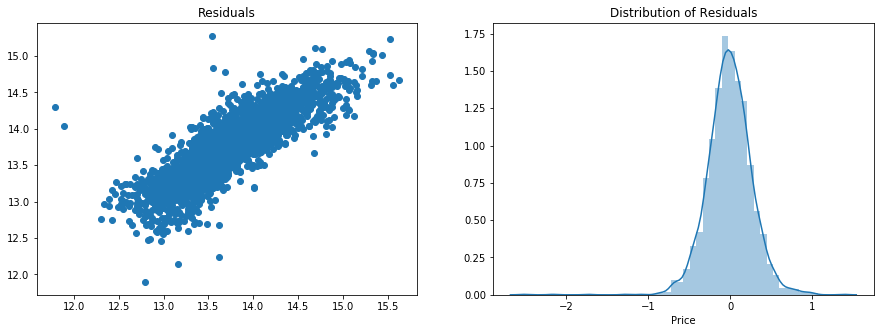

In [30]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.scatter(yd_test, yd_pred)
plt.title('Residuals')

plt.subplot(1, 2, 2)
sns.distplot((yd_test - yd_pred))
plt.title('Distribution of Residuals')
plt.show()

In [31]:
#selective feature regression
regr_s.fit(Xs_train, ys_train)
ys_pred = regr_s.predict(Xs_test)
print('Selective R2 Training Score: ', regr_s.score(Xs_train, ys_train))
print('Selective R2 Test Score: ', regr_s.score(Xs_test, ys_test))
print('Selective CV Scores: ', cross_val_score(regr_s, Xs_train, ys_train, cv=5), '\n')
print('MAE:', metrics.mean_absolute_error(np.exp(ys_test), np.exp(ys_pred)))
print('MSE:', metrics.mean_squared_error(np.exp(ys_test), np.exp(ys_pred)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(np.exp(ys_test), np.exp(ys_pred))))

Selective R2 Training Score:  0.5608803884944957
Selective R2 Test Score:  0.5661896874830493
Selective CV Scores:  [0.54938047 0.57775829 0.56770992 0.54746273 0.55865546] 

MAE: 287007.4893091545
MSE: 227856667566.37115
RMSE: 477343.34348178684


c:\users\zackb\appdata\local\programs\python\python36\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


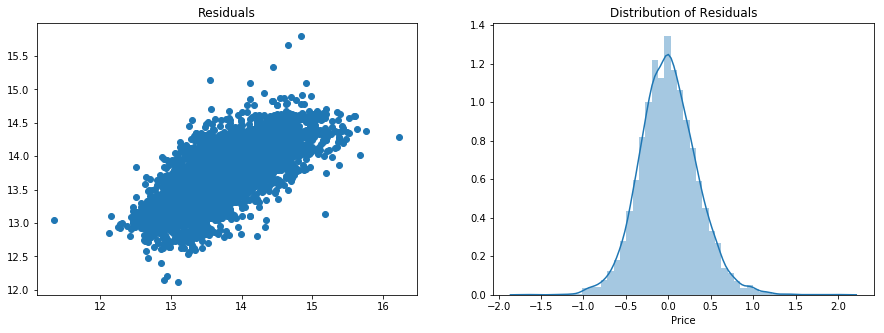

In [32]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.scatter(ys_test, ys_pred)
plt.title('Residuals')

plt.subplot(1, 2, 2)
sns.distplot((ys_test - ys_pred))
plt.title('Distribution of Residuals')
plt.show()

c:\users\zackb\appdata\local\programs\python\python36\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


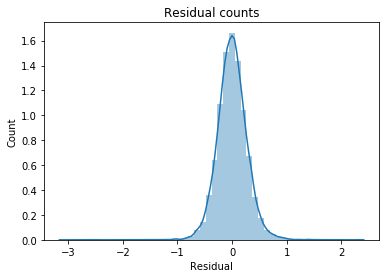

In [33]:
regr = LinearRegression()
X = df.drop(['Price', 'Date'], 1)
y = df.Price

regr.fit(X_d, y_d)

predicted = regr.predict(X_d).ravel()
actual = y_d

# Calculate the error, also called the residual.
residual = actual - predicted

sns.distplot(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

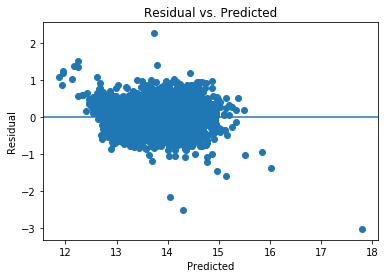

In [34]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()